# End of Semester Assignment
## Section 1

### Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from machine_learning.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
data = load_diabetes()
X = data.data
y = data.target

In [3]:
# Features of the diabetes dataset
feature_names = data.feature_names
print(f"Features: {feature_names}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

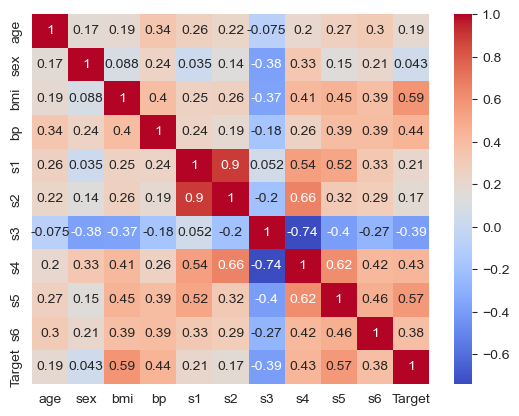

In [5]:
# Visualize correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [6]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create an instance of the LinearRegression model
model = LinearRegression()

In [9]:
# Train the model using gradient descent
model.fit(X_train, y_train, learning_rate=0.01, epochs=1000)

Epoch 0: Loss 14855.66147308782
Epoch 100: Loss 3112.0134012433386
Epoch 200: Loss 1673.750871311015
Epoch 300: Loss 1480.09130209828
Epoch 400: Loss 1453.3542236065553
Epoch 500: Loss 1449.33879278375
Epoch 600: Loss 1448.5056478455087
Epoch 700: Loss 1448.1477520887124
Epoch 800: Loss 1447.8723600422916
Epoch 900: Loss 1447.6169936508552


In [10]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [11]:
# Evaluate the model using Mean Squared Error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print(f"Testing MSE: {mse}")

Testing MSE: 2884.922802987494


In [12]:
# Make predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [13]:
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, train_predictions)

In [14]:
# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, test_predictions)

In [15]:
# Output the results
print(f"Training MSE: {train_mse}")

Training MSE: 2894.7400189884493


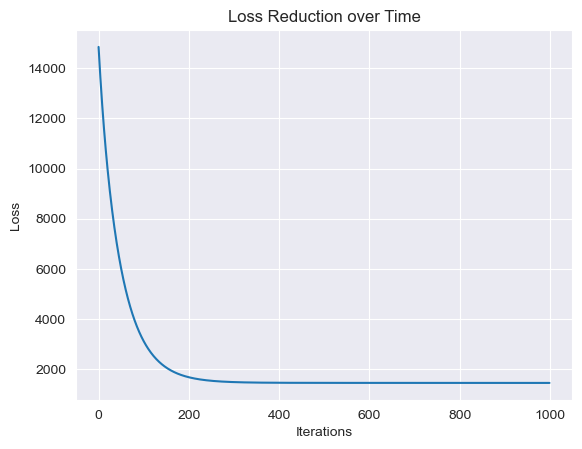

In [16]:
# Plot the loss reduction
model.plot_loss()

### Decision Tree

In [17]:
from machine_learning.decision_tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [18]:
# Sample dataset
dataset = {
    'Taste': ['Salty', 'Spicy', 'Spicy', 'Spicy', 'Spicy', 'Sweet', 'Salty', 'Sweet', 'Spicy', 'Salty'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Cold', 'Hot', 'Cold', 'Cold', 'Hot', 'Cold', 'Hot'],
    'Texture': ['Soft', 'Soft', 'Hard', 'Hard', 'Hard', 'Soft', 'Soft', 'Soft', 'Soft', 'Hard'],
    'Eat': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(dataset)

In [19]:
# Convert categorical columns to numeric
df['Taste'] = df['Taste'].map({'Salty': 0, 'Spicy': 1, 'Sweet': 2})
df['Temperature'] = df['Temperature'].map({'Cold': 0, 'Hot': 1})
df['Texture'] = df['Texture'].map({'Soft': 0, 'Hard': 1})
df['Eat'] = df['Eat'].map({'No': 0, 'Yes': 1})

In [20]:
# Split features and target
X = df.drop('Eat', axis=1)
y = df['Eat']

In [21]:
print(df)

   Taste  Temperature  Texture  Eat
0      0            1        0    0
1      1            1        0    0
2      1            1        1    1
3      1            0        1    0
4      1            1        1    1
5      2            0        0    1
6      0            0        0    0
7      2            1        0    1
8      1            0        0    1
9      0            1        1    1


In [22]:
# Train the custom decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

In [23]:
# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

Predictions: [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]


In [24]:
# Calculate Accuracy
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [25]:
# Calculate Precision
precision = precision_score(y, predictions)
print(f"Precision: {precision:.2f}")

Precision: 1.00


In [26]:
# Calculate Recall
recall = recall_score(y, predictions)
print(f"Recall: {recall:.2f}")

Recall: 0.83


In [27]:
# Calculate F1-Score
f1 = f1_score(y, predictions)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.91


In [28]:
# Print the textual representation of the tree
print("\nTextual Representation of the Tree:")
model.print_tree()  


Textual Representation of the Tree:
Taste <= 1?
  Left:
  Texture <= 0?
    Left:
    Taste <= 0?
      Left:
      Predict: 0
      Right:
      Predict: 0
    Right:
    Temperature <= 0?
      Left:
      Predict: 0
      Right:
      Predict: 1
  Right:
  Predict: 1



Graphical Representation of the Tree:


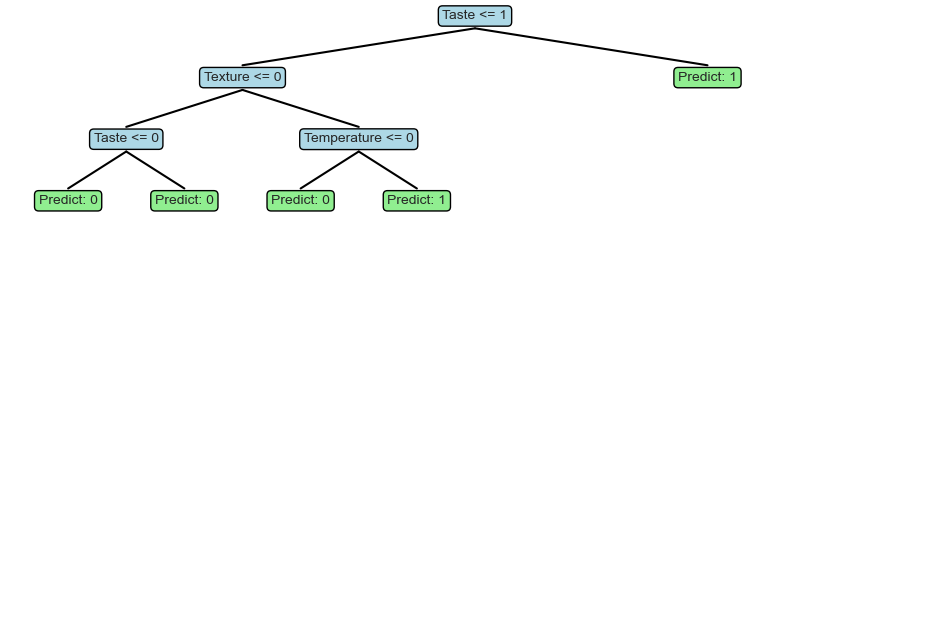

In [29]:
# Visualize the decision tree
print("\nGraphical Representation of the Tree:")
model.visualize()

### Naive Bayes Classifier

In [30]:
from machine_learning.naive_bayes import NaiveBayesClassifier
from sklearn.metrics import classification_report

In [31]:
# Dataset
dataset = {
    'Taste': ['Salty', 'Spicy', 'Spicy', 'Spicy', 'Spicy', 'Sweet', 'Salty', 'Sweet', 'Spicy', 'Salty'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Cold', 'Hot', 'Cold', 'Cold', 'Hot', 'Cold', 'Hot'],
    'Texture': ['Soft', 'Soft', 'Hard', 'Hard', 'Hard', 'Soft', 'Soft', 'Soft', 'Soft', 'Hard'],
    'Eat': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
}

In [32]:
# Convert to DataFrame
df = pd.DataFrame(dataset)

In [33]:
# Instantiate and train the Custom Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X, y)

Class Probabilities (Prior):
Eat
1    0.6
0    0.4
Name: count, dtype: float64
Feature Probabilities (Likelihood):
Class: 1
{'Taste': Taste
1    0.500000
2    0.333333
0    0.166667
Name: count, dtype: float64, 'Temperature': Temperature
1    0.666667
0    0.333333
Name: count, dtype: float64, 'Texture': Texture
1    0.5
0    0.5
Name: count, dtype: float64}
Class: 0
{'Taste': Taste
0    0.5
1    0.5
Name: count, dtype: float64, 'Temperature': Temperature
1    0.5
0    0.5
Name: count, dtype: float64, 'Texture': Texture
0    0.75
1    0.25
Name: count, dtype: float64}


In [34]:
# Make predictions
predictions = nb_classifier.predict(X)
print("Predictions:", predictions)

Row: {'Taste': 0, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -3.401197381662156, 0: -2.5902671654458262}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -2.3025850929940455, 0: -2.5902671654458262}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 1}
Class Probabilities: {1: -2.3025850929940455, 0: -3.688879454113936}
Row: {'Taste': 1, 'Temperature': 0, 'Texture': 1}
Class Probabilities: {1: -2.9957322735539913, 0: -3.688879454113936}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 1}
Class Probabilities: {1: -2.3025850929940455, 0: -3.688879454113936}
Row: {'Taste': 2, 'Temperature': 0, 'Texture': 0}
Class Probabilities: {1: -3.401197381662156, 0: -24.922970914826337}
Row: {'Taste': 0, 'Temperature': 0, 'Texture': 0}
Class Probabilities: {1: -4.094344562222101, 0: -2.5902671654458262}
Row: {'Taste': 2, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -2.7080502011022105, 0: -24.922970914826337}
Row: {'Taste': 1, 'Temperature': 0, 'Texture':

In [35]:
# Evaluate accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [36]:
# Train the Naive Bayes Classifier
model = NaiveBayesClassifier()
model.fit(X, y)

Class Probabilities (Prior):
Eat
1    0.6
0    0.4
Name: count, dtype: float64
Feature Probabilities (Likelihood):
Class: 1
{'Taste': Taste
1    0.500000
2    0.333333
0    0.166667
Name: count, dtype: float64, 'Temperature': Temperature
1    0.666667
0    0.333333
Name: count, dtype: float64, 'Texture': Texture
1    0.5
0    0.5
Name: count, dtype: float64}
Class: 0
{'Taste': Taste
0    0.5
1    0.5
Name: count, dtype: float64, 'Temperature': Temperature
1    0.5
0    0.5
Name: count, dtype: float64, 'Texture': Texture
0    0.75
1    0.25
Name: count, dtype: float64}


In [37]:
# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

Row: {'Taste': 0, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -3.401197381662156, 0: -2.5902671654458262}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -2.3025850929940455, 0: -2.5902671654458262}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 1}
Class Probabilities: {1: -2.3025850929940455, 0: -3.688879454113936}
Row: {'Taste': 1, 'Temperature': 0, 'Texture': 1}
Class Probabilities: {1: -2.9957322735539913, 0: -3.688879454113936}
Row: {'Taste': 1, 'Temperature': 1, 'Texture': 1}
Class Probabilities: {1: -2.3025850929940455, 0: -3.688879454113936}
Row: {'Taste': 2, 'Temperature': 0, 'Texture': 0}
Class Probabilities: {1: -3.401197381662156, 0: -24.922970914826337}
Row: {'Taste': 0, 'Temperature': 0, 'Texture': 0}
Class Probabilities: {1: -4.094344562222101, 0: -2.5902671654458262}
Row: {'Taste': 2, 'Temperature': 1, 'Texture': 0}
Class Probabilities: {1: -2.7080502011022105, 0: -24.922970914826337}
Row: {'Taste': 1, 'Temperature': 0, 'Texture':

In [38]:
# Calculate and print classification metrics: Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



## Section 2: Search

### Search Algorithm 

In [39]:

from problems.problem import FlightFinder
from search_algorithms.route_finding.bfs import BFS
from search_algorithms.route_finding.dfs import DFS
from search_algorithms.route_finding.a_star import AStar

In [40]:
# Define the heuristic for A* (e.g., straight-line distance to the goal)
def heuristic(node):
    return 10

In [41]:
# Initialize the problem
flight_finder = FlightFinder()
flights = flight_finder.flights
start = 'New York'
goal = 'Tokyo'

BFS Path: ['New York', 'London', 'Tokyo'], Time taken: 0.000032 seconds


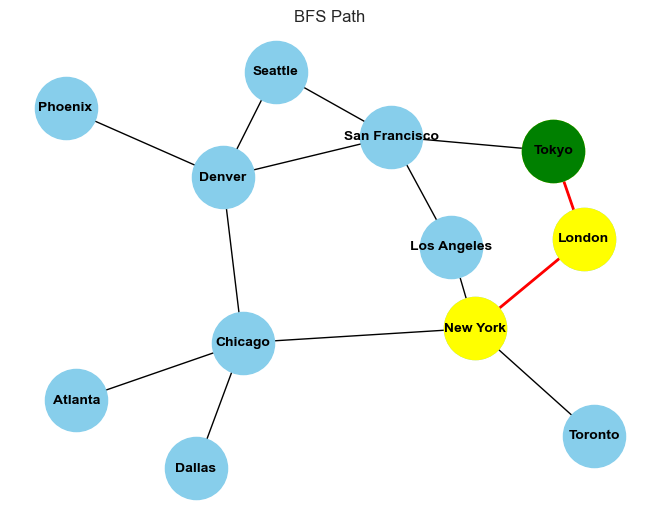

In [42]:
# BFS Search
bfs = BFS(start=start, goal=goal, flights=flights)
bfs_path, bfs_time = bfs.measure_runtime()
print(f"BFS Path: {bfs_path}, Time taken: {bfs_time:.6f} seconds")
bfs.visualize_path()

DFS Path: ['New York', 'Los Angeles', 'San Francisco', 'Tokyo'], Time taken: 0.000023 seconds


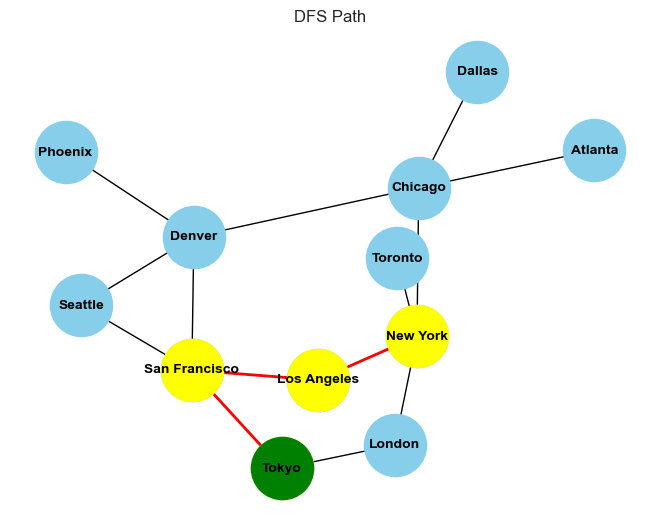

In [43]:
# DFS Search
dfs = DFS(start=start, goal=goal, flights=flights)
dfs_path, dfs_time = dfs.measure_runtime()
print(f"DFS Path: {dfs_path}, Time taken: {dfs_time:.6f} seconds")
dfs.visualize_path()

A* Path: ['New York', 'Los Angeles', 'San Francisco', 'Tokyo'], Time taken: 0.000029 seconds


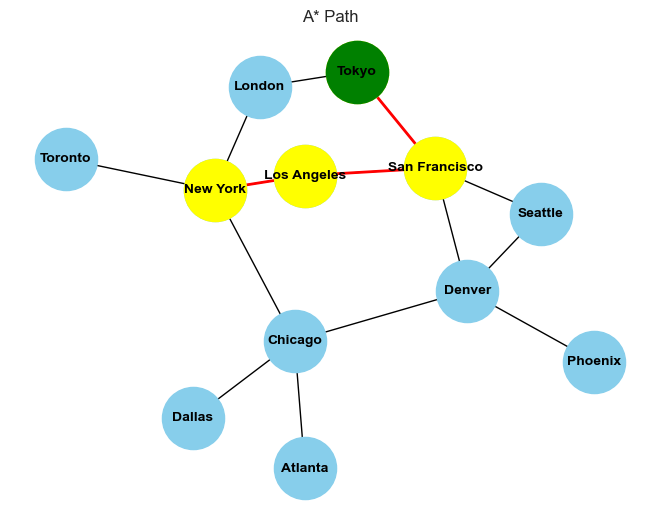

In [44]:
# A* Search
a_star = AStar(start=start, goal=goal, flights=flights, heuristic=heuristic)
a_star_path, a_star_time = a_star.measure_runtime()
print(f"A* Path: {a_star_path}, Time taken: {a_star_time:.6f} seconds")
a_star.visualize_path()

### Wumpus Problem with Search Algorithm

In [1]:
from problems.wumpus import WumpusWorld
import time
from search_algorithms.wumpus.bfs import BFS
from search_algorithms.wumpus.dfs import DFS
from search_algorithms.wumpus.a_star import AStar, manhattan_heuristic
from search_algorithms.wumpus.search import SearchProblem

In [46]:
# Initialize the Wumpus World with the updated gold position
wumpus_world = WumpusWorld(
    pit_location=[(1, 2), (3, 3)],
    wumpus_location=(1, 3),
    gold_location=(2, 2)  # Specify where the gold should be placed
)

In [47]:
# Display the grid
print("Wumpus World Grid:")
wumpus_world.display()

Wumpus World Grid:
. . B S
. B P W
. . G S
. . B P


In [48]:
# 2. Setup the Search Problem
search_problem = SearchProblem(wumpus_world)

In [49]:
# 3. Running Breadth-First Search (BFS)
start_time = time.time()  # Start timer for BFS
print("Running Breadth-First Search (BFS)...")
bfs_algorithm = BFS(search_problem)
bfs_path = bfs_algorithm.search()
bfs_time = time.time() - start_time  # Calculate BFS execution time

if bfs_path:
    print("BFS Path found:", bfs_path)
else:
    print("No solution found with BFS.")
print(f"BFS Execution Time: {bfs_time:.4f} seconds\n")

Running Breadth-First Search (BFS)...
BFS Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]
BFS Execution Time: 0.0000 seconds



In [50]:
# 4. Running Depth-First Search (DFS)
start_time = time.time()  # Start timer for DFS
print("Running Depth-First Search (DFS)...")
dfs_algorithm = DFS(search_problem)
dfs_path = dfs_algorithm.search()
dfs_time = time.time() - start_time  # Calculate DFS execution time

if dfs_path:
    print("DFS Path found:", dfs_path)
else:
    print("No solution found with DFS.")
print(f"DFS Execution Time: {dfs_time:.4f} seconds\n")

Running Depth-First Search (DFS)...
DFS Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2)]
DFS Execution Time: 0.0000 seconds



In [51]:
# 5. Running A* Search
start_time = time.time()  # Start timer for A*
print("Running A* Search...")
a_star_algorithm = AStar(search_problem, heuristic_func=manhattan_heuristic)
a_star_path = a_star_algorithm.search()
a_star_time = time.time() - start_time  # Calculate A* execution time

if a_star_path:
    print("A* Path found:", a_star_path)
else:
    print("No solution found with A*.")
print(f"A* Execution Time: {a_star_time:.4f} seconds\n")

Running A* Search...
A* Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]
A* Execution Time: 0.0000 seconds



In [52]:
# 6. Display paths on the grid
def display_path(wumpus_world, path):
    print("\nPath on the grid:")
    grid = [['.' for _ in range(wumpus_world.size)] for _ in range(wumpus_world.size)]
    for (x, y) in path:
        grid[x][y] = 'X'  # Mark the path
    for row in grid:
        print(" ".join(row))

In [53]:
# Display the BFS path on the grid
if bfs_path:
    display_path(wumpus_world, bfs_path)



Path on the grid:
X . . .
X . . .
X X X .
. . . .


In [54]:
# Display the DFS path on the grid
if dfs_path:
    display_path(wumpus_world, dfs_path)


Path on the grid:
X X X X
X X X X
X X X .
. . . .


In [55]:
# Display the A* path on the grid
if a_star_path:
    display_path(wumpus_world, a_star_path)


Path on the grid:
X . . .
X . . .
X X X .
. . . .


## Section 3: Logic

### Wumpus Problem with Logic

In [1]:
from logic_algorithims.wumpus_logic import simulate_agent_movement

In [2]:
# Run the simulation
simulate_agent_movement()

Simulating agent movement...
Wumpus World Grid:
B S . G
P W S .
B P B .
A B . .

Safe moves: [(2, 1), (1, 2)]
Agent moved to (2, 1)
Wumpus World Grid:
B S . G
P W S .
B P B .
. A . .

Marked (3, 1) as safe.
Marked (1, 1) as safe.
Safe moves: [(3, 1)]
Agent moved to (3, 1)
Wumpus World Grid:
B S . G
P W S .
B P B .
. B A .

Marked (4, 1) as safe.
Safe moves: [(4, 1), (3, 2)]
Agent moved to (4, 1)
Wumpus World Grid:
B S . G
P W S .
B P B .
. B . A

Marked (3, 1) as safe.
Marked (4, 2) as safe.
Safe moves: [(4, 2)]
Agent moved to (4, 2)
Wumpus World Grid:
B S . G
P W S .
B P B A
. B . .

Marked (4, 3) as safe.
Marked (4, 1) as safe.
Safe moves: [(3, 2), (4, 3)]
Agent moved to (3, 2)
Wumpus World Grid:
B S . G
P W S .
B P A .
. B . .

Marked (4, 2) as safe.
Marked (3, 1) as safe.
Safe moves: [(3, 3)]
Agent moved to (3, 3)
Wumpus World Grid:
B S . G
P W A .
B P B .
. B . .

Marked (4, 3) as safe.
Marked (3, 4) as safe.
Safe moves: [(4, 3), (3, 4)]
Agent moved to (4, 3)
Wumpus World Grid:
B 

### Scheduling Problem


In [62]:
from problems.scheduling import get_schedule

In [63]:
# Call the scheduling function
schedule = get_schedule()  # This should now return the query results

Query Result: Lecturer | Class       | Time     
---------|-------------|----------
Sophia   | Applied AI  | 11AM-12PM
Matthew  | Intro to Ai | 9AM-10AM 
